# K-Means Clustering

### Random 하게 생성된 toy dataset 으로 K-Means clustering test

make_blobs : 
```
    Input :
         n_samples :  cluster 에 균등 분할될 total data point 숫자  
         centers : generate 할 centroid 숫자  
         cluster_std : cluster 의 standard deviation    

    Output : 
        X: 생성된 sample 들  
        y: 각 sample 의 label
```
KMeans :  
> init : initialization method -> k-means++ (smart choosing of centroids)  
> n_clusters : k 값  
> n_init : 반복횟수  

DBSCAN :

>eps : epsilon (radius)  
>min_sample : minimum samples within the radius

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
centroidLocation = [[3,2], [1,-1],[-1,2]]

X, _ = make_blobs(n_samples=1500, centers=centroidLocation)

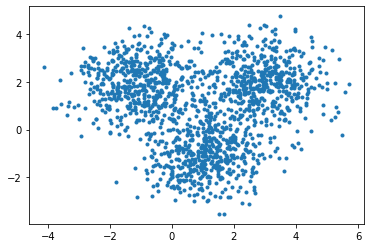

In [4]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [5]:
print(X.shape)
print(X[:10])

(1500, 2)
[[ 2.71230522 -1.79211502]
 [-0.17387429  1.94224344]
 [ 1.4595849  -0.71994214]
 [ 3.47043314  2.31144707]
 [ 3.44819528  3.69618157]
 [ 3.61407937  2.92220667]
 [-1.14763741  3.13181196]
 [ 3.06651722  2.3024719 ]
 [ 4.8831507   0.65224094]
 [-0.5033848   3.01213319]]


In [6]:
nclusters = 3

In [9]:
k_means = KMeans(n_clusters=nclusters)

In [10]:
k_means.fit(X)

KMeans(n_clusters=3)

In [11]:
k_means.labels_

array([0, 1, 0, ..., 2, 0, 2], dtype=int32)

In [12]:
centers = k_means.cluster_centers_
centers

array([[ 1.09377948, -1.06187746],
       [-1.07551635,  1.95077137],
       [ 2.94332137,  2.03105234]])

In [13]:
from matplotlib.colors import ListedColormap

colors_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
colors_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

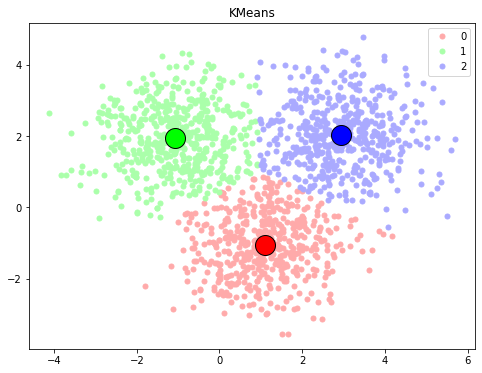

In [14]:
plt.figure(figsize=(8,6))

for i in range(nclusters):
    members = k_means.labels_ == i
    plt.plot(X[members, 0], X[members, 1], '.', color=colors_light(i), markersize=10, label=i)
    plt.plot(centers[i, 0], centers[i, 1], 'o', color=colors_bold(i), markeredgecolor='k', markersize=20)

plt.title("KMeans")
plt.legend()

# DBSCAN

In [84]:
from sklearn.cluster import DBSCAN

X1, _ = make_blobs(n_samples=500, centers=[[-3,-3]])
X2, _ = make_blobs(n_samples=500, centers=[[3,3]])
X3 = np.random.rand(500, 2) * 3 + 4
X4 = np.random.randn(10, 2) * 3

X1.shape, X2.shape, X3.shape

((500, 2), (500, 2), (500, 2))

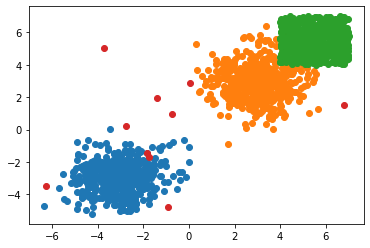

In [85]:
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.scatter(X3[:, 0], X3[:, 1])
plt.scatter(X4[:, 0], X4[:, 1])

In [86]:
X = np.vstack([X1, X2, X3, X4])
X.shape

(1510, 2)

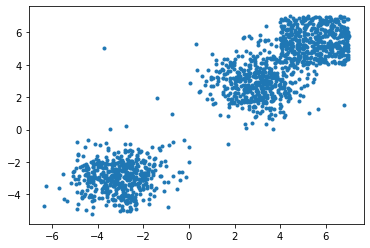

In [87]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [88]:
epsilon = 0.3
minimumSamples = 7

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)

labels = db.labels_

print(labels.shape)
print(labels)
print(db.core_sample_indices_.shape)
print(db.core_sample_indices_)

(1510,)
[ 0  0  0 ... -1 -1 -1]
(1250,)
[   0    1    2 ... 1497 1498 1499]


In [89]:
unique_labels = set(labels)       # -1 : outlier
unique_labels

{-1, 0, 1, 2, 3}

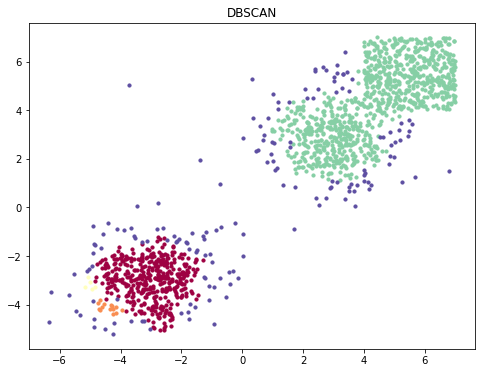

In [90]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    members = (labels == k)
    plt.scatter(X[members, 0], X[members, 1], color=col, marker='o', s=10)

plt.title('DBSCAN')
plt.show()

## 실습 1 - Iris dataset 을 이용한 KMeans Clustering

In [92]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

X = iris.data

In [46]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
# your code below

## 실습 2. KMeans Clustering을 이용한 Customer Segmentation

고객 세분화(Customer segmentation)는 고객 기반을 유사한 특성을 가진 개인의 그룹으로 분할하는 관행입니다. 예를 들어 한 그룹에는 높은 수익을 올리고 위험이 적은, 즉 제품을 구매하거나 서비스에 가입할 가능성이 큰 고객이 있을 수 있습니다. 또 다른 그룹에는 수익이 나지 않는 고객 등이 포함될 수 있습니다.

### Downloading Data

'customer_segmentation.csv' https://ibm.box.com/shared/static/rdf2wtk4ozh21p2j2xpenrg4bb0lkgjr.csv

In [97]:
customers_df = pd.read_csv('Cust_Segmentation.csv')
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

**Address**는 범주형 변수(categorical variable) 입니다. 이산 변수(discrete variable)는 유클리드 거리 계산을 할 수 없으므로 이 feature 를 삭제하고 클러스터링을 실행합니다.

In [115]:
df = customers_df.drop(['Customer Id','Address'], axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [116]:
df.shape

(850, 8)

In [117]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [118]:
df.dropna(inplace=True)
df.shape

(700, 8)

In [119]:
X = df.values
X.shape

(700, 8)

**StandardScaler()** 를 사용하여 dataset 을 정규화 합니다.

In [120]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [121]:
X.shape

(700, 8)

In [138]:
num_clusters = 3

k_means = KMeans(n_clusters = num_clusters)
k_means.fit(X)
labels = k_means.labels_

set(labels)

{0, 1, 2}

### Insights

dataset 의 각 행은 고객을 나타내므로 각 행에는 레이블이 assign 됩니다.

In [128]:
df["Labels"] = labels
df.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,2
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,2
4,47,1,31,253,9.308,8.908,0.0,7.2,1


각 군집의 특징을 평균화하여 중심 값을 쉽게 확인할 수 있습니다.

In [129]:
df.groupby('Labels').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,
0,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025
1,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
2,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884


이제 연령과 소득에 따른 고객 분포를 살펴 보겠습니다.

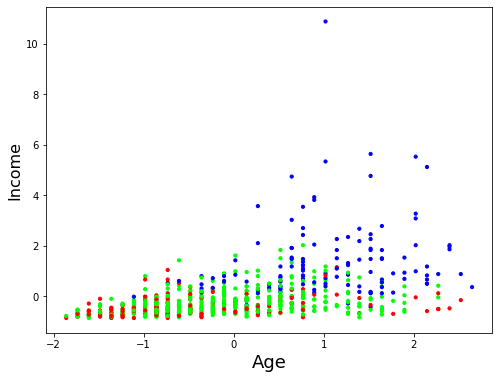

In [155]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], s=10, c=colors(labels))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

<IPython.core.display.Javascript object>


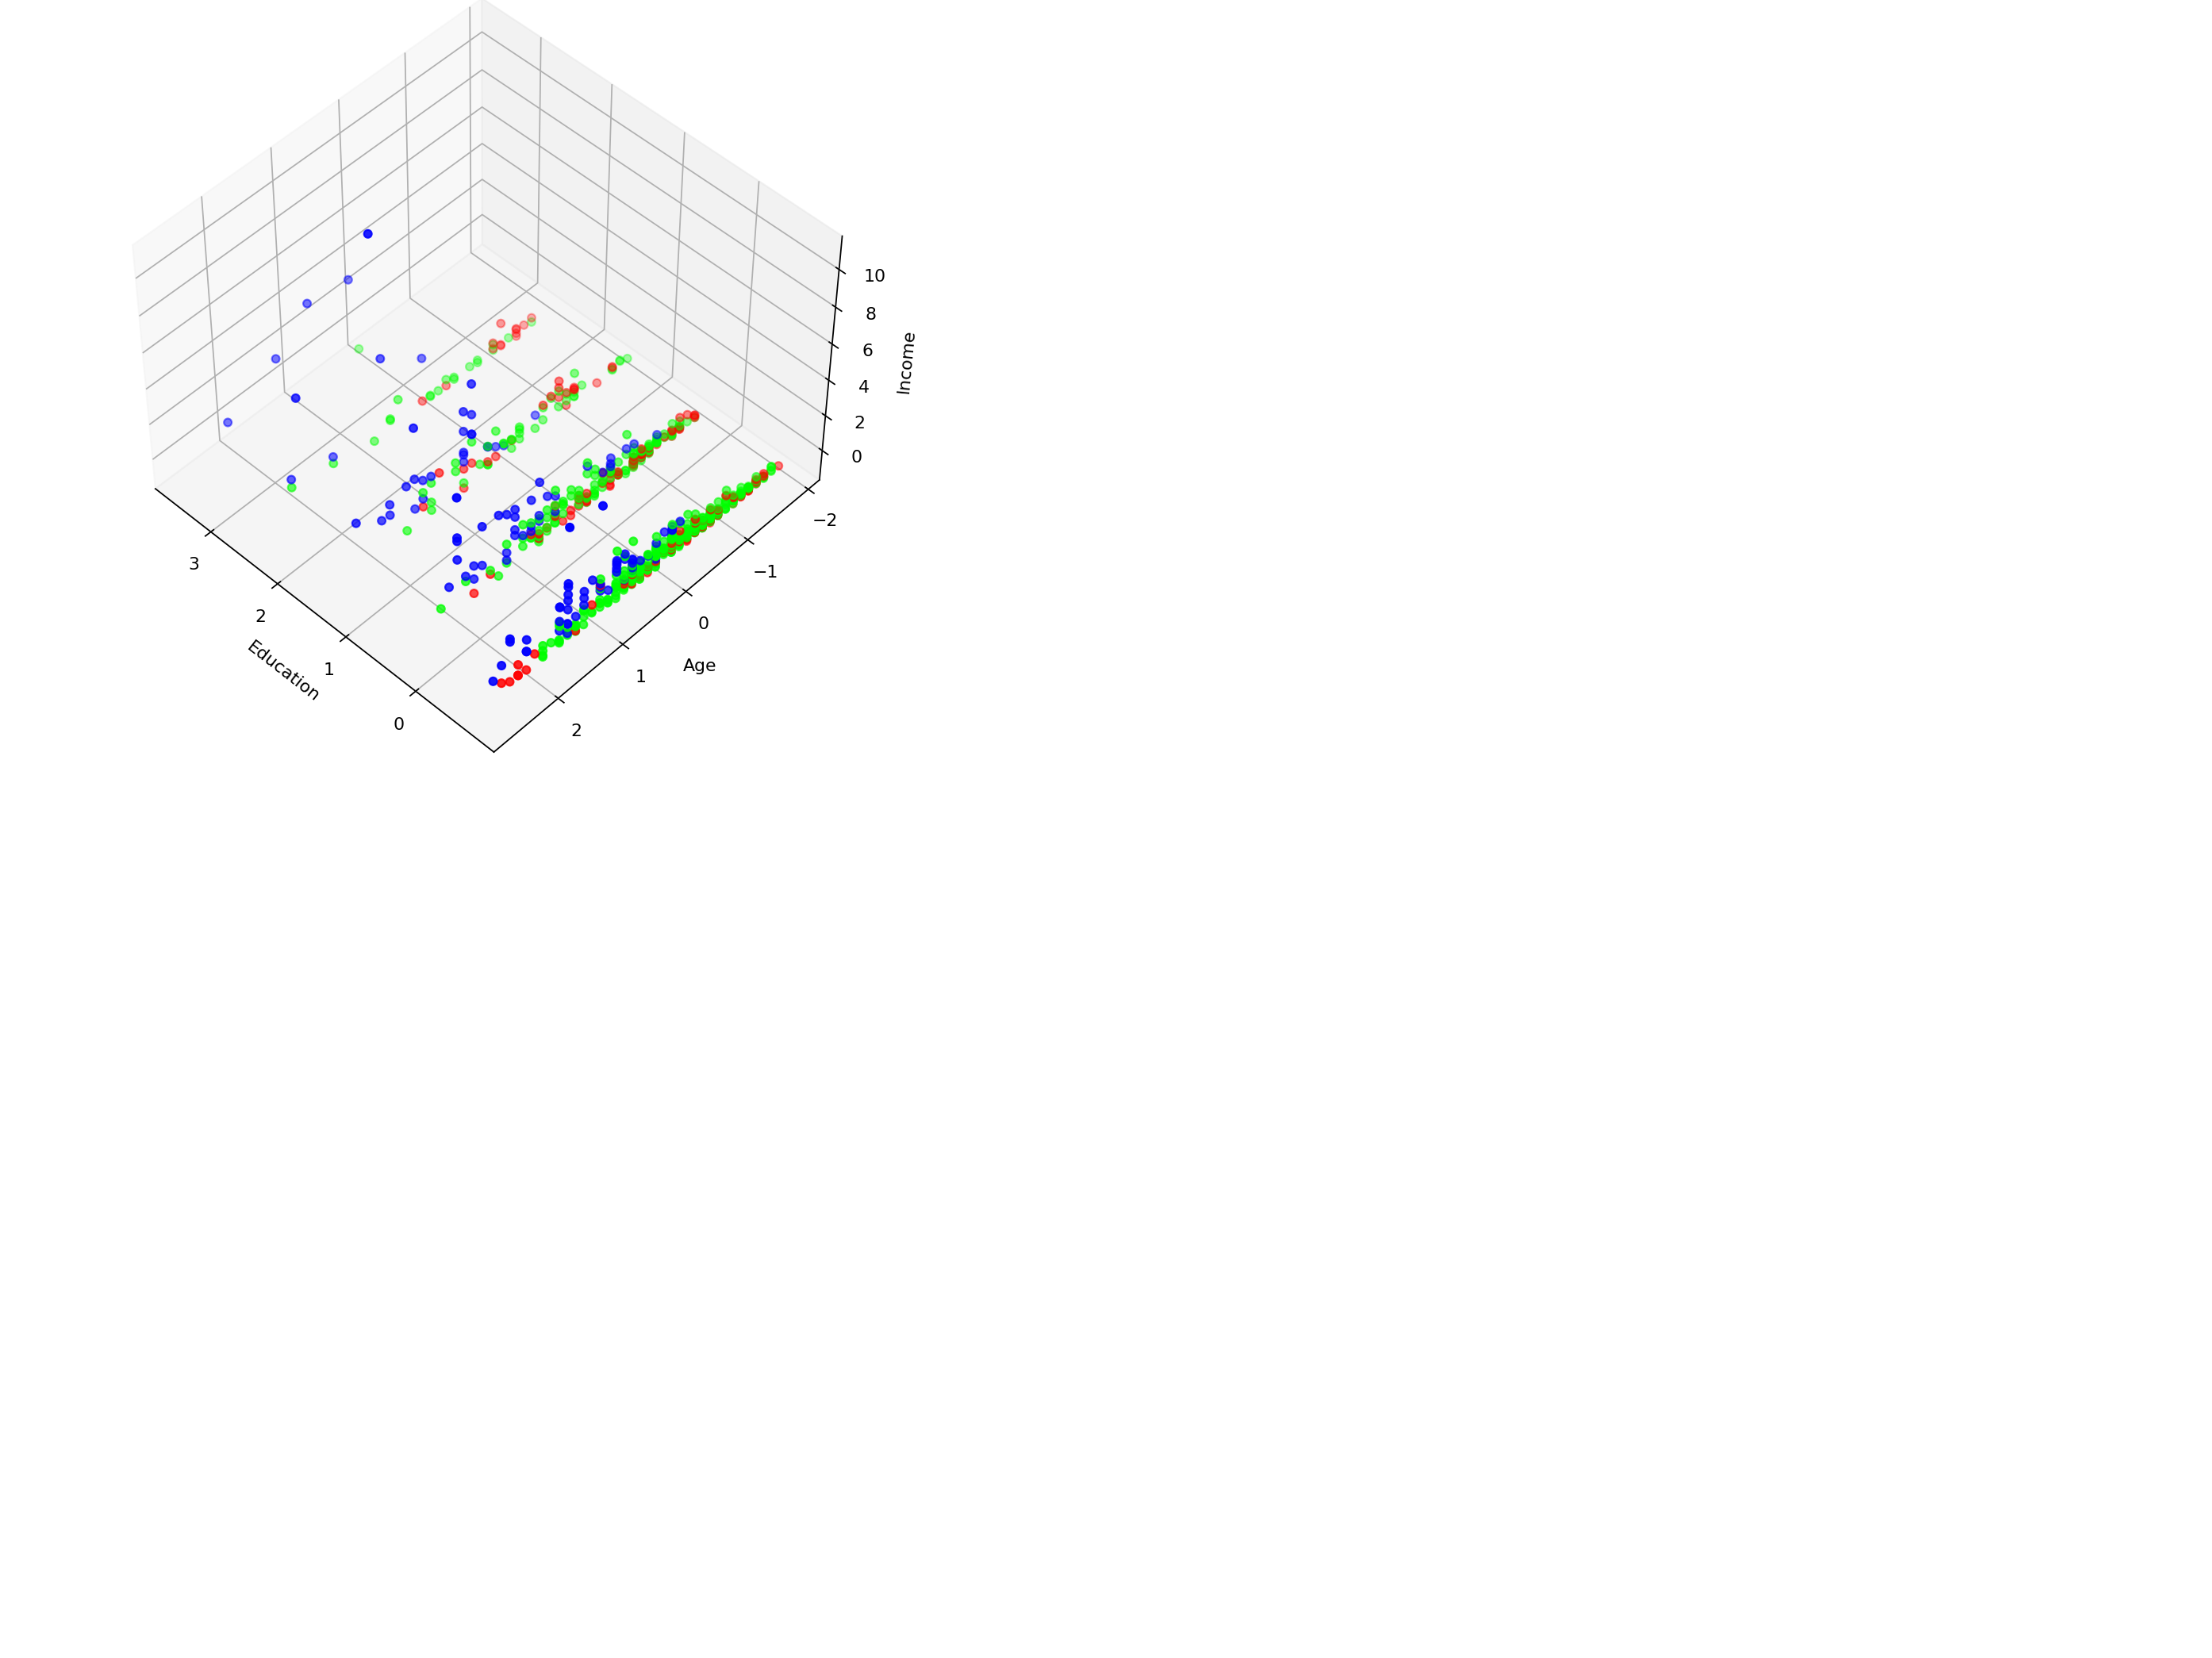

In [164]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)  

plt.cla()       # clear the current axis

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=colors(labels))

k-means는 고객을 상호 배타적인 그룹 (예 : 3 개의 클러스터)으로 분할합니다. 각 클러스터의 고객은 인구 통계학적으로 유사합니다.
이제 각 클러스터의 공통적인 특성을 고려하여 각 그룹에 대한 프로필을 만들 수 있습니다.

-유능하고 교육받은 고령자  
-중년 및 중년 소득  
-젊고 낮은 소득